<h2><font color="#004D7F" size=5>Módulo 2: Bootstrap Aggregation</font></h2>



<h1><font color="#004D7F" size=6> 2. Bagged Decision Trees (Bagging) </font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo de conjunto Bagging](#section1)
* [2. Bagging según el tipo de problema](#section2)
    * [2.1. Bagging para Clasificación](#section21)
    * [2.2. Bagging para Regresión](#section22)
* [3. Hiperparámetros de Bagging](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Número de muestras](#section32)
   * [3.3. Algoritmo alternativo](#section33)
* [4. Extensiones](#section4)
   * [4.1. Conjunto Pasting](#section41)
   * [4.2. Conjunto Random Patches](#section42)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Bagging es un algoritmo conjunto de aprendizaje automático que combina las predicciones de muchos árboles de decisión. Bagging funciona bien en general y proporciona la base para todo un campo de conjuntos de algoritmos de árboles de decisión, como los populares algoritmos de conjuntos de Random Forest y Extra Trees, así como los algoritmos de conjuntos menos conocidos de Pasting, Random Subspaces and Random Patches. En este tutorial, descubrirá cómo desarrollar conjuntos de Bagging para clasificación y regresión. Después de completar este tutorial, sabrá :
- Bagging es un conjunto creado a partir de árboles de decisión que se ajustan a diferentes muestras de un conjunto de datos.
- Cómo utilizar el conjunto Bagging para clasificación y regresión con Scikit-learn.
- Cómo explorar el efecto de los hiperparámetros del modelo Bagging en el rendimiento del modelo.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo de conjunto Bagging</font>

Bootstrap Aggregation (Bagging) se trata de un conjunto de modelos de árboles de decisión, aunque la técnica de Bagging también se puede utilizar para combinar las predicciones de otro tipo de modelos. 
- Como sugiere su nombre, la agregación bootstrap se basa en la idea de la muestra bootstrap. 
- Una muestra bootstrap es una muestra de un conjunto de datos con reemplazo. 
- Reemplazo significa que se reemplaza una muestra extraída del conjunto de datos, lo que permite seleccionarla nuevamente y quizás varias veces en la nueva muestra. 
- Esto significa que la muestra puede tener ejemplos duplicados del conjunto de datos original. 
- La técnica de muestreo bootstrap se utiliza para estimar una estadística de población a partir de una pequeña muestra de datos. 
- Esto se logra extrayendo múltiples muestras bootstrap, calculando la estadística de cada una e informando la estadística media en todas las muestras.

Un ejemplo de uso del muestreo bootstrap sería estimar la media poblacional a partir de un pequeño conjunto de datos. 
- Se extraen varias muestras de arranque del conjunto de datos, se calcula la media de cada una y luego se informa la media de las medias estimadas como una estimación de la media de la población.

Este mismo enfoque se puede utilizar para crear un conjunto de modelos de árboles de decisión. 
- Esto se logra extrayendo múltiples muestras de arranque del conjunto de datos de entrenamiento y ajustando un árbol de decisión en cada una. 
- Luego, las predicciones de los árboles de decisión se combinan para proporcionar una predicción más sólida y precisa que un único árbol de decisión (normalmente, pero no siempre).

Según para cada tipo de problema:
- Las predicciones se hacen para problemas de regresión promediando la predicción entre los árboles de decisión. 
- Las predicciones para problemas de clasificación se realizan tomando la predicción de voto mayoritario para las clases entre las predicciones realizadas por los árboles de decisión. 

Los árboles de decisión bagged son efectivos porque cada árbol de decisión se ajusta a un conjunto de datos de entrenamiento ligeramente diferente, lo que a su vez permite que cada árbol tenga diferencias menores y haga predicciones hábiles ligeramente diferentes. Técnicamente decimos que el método es efectivo porque __los árboles tienen una baja correlación entre las predicciones y, a su vez, los errores de predicción__.

Se utilizan árboles de decisión, específicamente árboles de decisión no podados, ya que se ajustan ligeramente a los datos de entrenamiento y tienen una gran varianza. Se pueden utilizar otros algoritmos de aprendizaje automático de alta varianza, como un algoritmo KNN con un valor _k_ bajo, aunque los árboles de decisión han demostrado ser los más efectivos.

Bagging no siempre ofrece una mejora. Para modelos de baja varianza que ya funcionan bien, Bagging puede resultar en una disminución en el rendimiento del modelo.

<figure><center>
  <img src="data/bagging.png" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Bagging. Extraída de <a href="https://www.geeksforgeeks.org/ml-bagging-classifier/">Geeksforgeeks</a></blockquote></figcaption>
</center></figure>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. Bagging según el tipo de problema</font>

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. Bagging para Clasificación</font>

En esta sección, veremos el uso de Bagging para un problema de clasificación. 

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada. El ejemplo completo se enumera a continuación.

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

A continuación, podemos evaluar un algoritmo Bagging en este conjunto de datos. 
- Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 
- Informaremos la media y la desviación estándar del accuracy del modelo en todas las repeticiones y pliegues.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
</div>

In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# definir el modelo model
model = ???
# definir el procedimiento de evaluación
cv = ???
# evaluación del modelo
n_scores = ???

print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy medio: 0.868 (0.034)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section213"></a> 
### <font color="#004D7F"> 2.1.3. Predicción</font>

También podemos utilizar el modelo Bagging como modelo final y hacer predicciones para la clasificación. Primero, el conjunto Bagging se ajusta a todos los datos disponibles, luego se puede llamar a la función `predict()` para hacer predicciones sobre nuevos datos. 

El siguiente ejemplo demuestra esto en nuestro conjunto de datos de clasificación binaria.

In [3]:
from sklearn.ensemble import BaggingClassifier

# definir el modelo
model = ???
# Entrenar el modelo
???
# realizar la predicción
row = [-4.7705504, -1.88685058, -0.96057964, 2.53850317, -6.5843005, 3.45711663, -7.46225013, 2.01338213, -0.45086384, -1.89314931, -2.90675203, -0.21214568, -0.9623956, 3.93862591, 0.06276375, 0.33964269, 4.0835676, 1.31423977, -2.17983117, 3.1047287]
yhat = ???

print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


<a id="section22"></a> 
## <font color="#004D7F"> 2.2. Bagging para Regresión</font>

En esta sección, veremos el uso de Bagging para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada. El ejemplo completo se enumera a continuación.

In [9]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

A continuación, podemos evaluar un algoritmo de ensacado en este conjunto de datos. 
- Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 
- Informaremos el error absoluto medio (MAE) del modelo en todas las repeticiones y pliegues.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)
</div>

In [12]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

# definir el modelo
model = ???
# sistema de entrenamiento
cv = ???
# evaluar el modelo
n_scores = ???
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -101.894 (7.769)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section223"></a> 
### <font color="#004D7F"> 2.2.3. Predicción</font>

También podemos utilizar el modelo Bagging como modelo final y hacer predicciones para la regresión. Primero, el conjunto Bagging se ajusta a todos los datos disponibles, luego se puede llamar a la función `predict()` para hacer predicciones sobre nuevos datos. 

El siguiente ejemplo demuestra esto en nuestro conjunto de datos de regresión.

In [13]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X, y)
row = [0.88950817, -0.93540416, 0.08392824, 0.26438806, -0.52828711, -1.21102238, -0.4499934, 1.47392391, -0.19737726, -0.22252503, 0.02307668, 0.26953276, 0.03572757, -0.51606983, -0.39937452, 1.8121736, -0.00775917, -0.02514283, -0.76089365, 1.58692212]
yhat = model.predict([row])
print('Prediction: %d' % yhat[0])

Prediction: -149


---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de Bagging</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto Bagging y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

Normalmente, la cantidad de árboles aumenta hasta que se estabiliza el rendimiento del modelo. 
- Bagging y los conjuntos relacionados de algoritmos de árboles de decisión (como bosque aleatorio) parecen ser algo inmunes al sobreajuste del conjunto de datos de entrenamiento dada la naturaleza estocástica del algoritmo de
aprendizaje. 

El número de árboles se puede establecer mediante el argumento `n_estimators` y el valor predeterminado es 100.
El siguiente ejemplo explora el efecto de la cantidad de árboles con valores entre 10 y 5000.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

# dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y

In [ ]:
# establecer el número de árboles a evaluar
def get_models():
    ???
    # definir el número de árboles a evaluar
    ???
    ???
        ???
    ???

In [ ]:
# evaluar el modelo con cross-validation
def evaluate_model(model, X, y):
    # definir el procedimiento de evaluación
    ???
    # evaluar el modelo
    ???
    ???

In [ ]:
# definimos el dataset
???
# declaramos los modelos a evaluar
???
# evaluar modelos y almacenar resultados
???
???:
    # evaluar el modelo
    ???
    # almacenar los resultados
    ???
    ???
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.853 (0.038)
>50 0.883 (0.040)
>100 0.877 (0.040)
>500 0.885 (0.037)
>1000 0.886 (0.036)
>5000 0.886 (0.037)


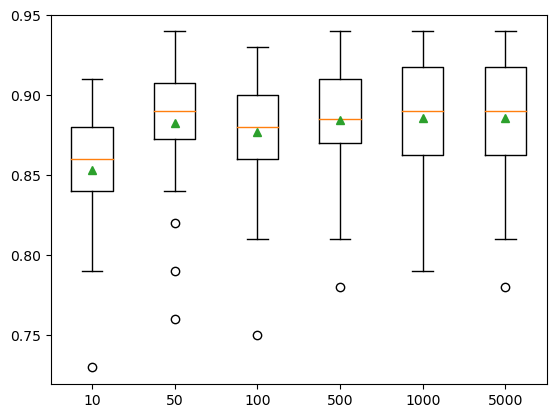

In [7]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Número de muestras</font>

El tamaño de la muestra de arranque también se puede variar. 
- El valor predeterminado es crear una muestra de arranque que tenga la misma cantidad de ejemplos que el conjunto de datos original. 
- El uso de un conjunto de datos más pequeño puede aumentar la varianza de los árboles de decisión resultantes y podría dar como resultado un mejor rendimiento general.
- El número de muestras utilizadas para ajustar cada árbol de decisión se establece mediante el argumento `max_samples`. 

El siguiente ejemplo explora muestras de diferentes tamaños como una proporción del conjunto de datos original del 10% al 100% (el valor predeterminado).

In [ ]:
from numpy import arange
# lista de modelos a evaluar
def get_models():
    ???
    # explorar los ratios de muestras del 10% al 100% en incrementos del 10%
    ???
        ???
        ???
    ???

In [ ]:
# definir el dataset
X, y = ???
# obtrenemos los modelos a evaluar
models = ???
# evaluar los modelos
results, names = list(), list()
???:
    ???
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.813 (0.048)
>0.2 0.831 (0.037)
>0.3 0.843 (0.040)
>0.4 0.849 (0.036)
>0.5 0.847 (0.037)
>0.6 0.859 (0.042)
>0.7 0.857 (0.038)
>0.8 0.861 (0.038)
>0.9 0.866 (0.037)
>1.0 0.859 (0.036)


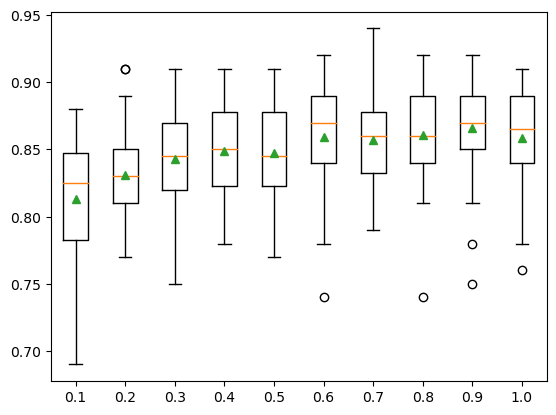

In [9]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Algoritmo alternativo</font>

Se pueden utilizar otros algoritmos con bagging y se deben configurar para que tengan una varianza modestamente alta. Un ejemplo es el algoritmo KNN donde el valor _k_ se puede establecer en un valor bajo. El algoritmo utilizado en el conjunto se especifica mediante el argumento `estimator` y debe establecerse en una instancia del algoritmo y la configuración del algoritmo que se utilizará.

El siguiente ejemplo demuestra el uso de `KNeighborsClassifier` como algoritmo base con el hiperparámetro predeterminados _k_ que es 5.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La libreía no ha sido actualizada a la última versión de Numpy, es por eso que le salen muchos errores tipo warning. Por tanto, tenga en cuenta que le van a salir muchos fallos, no se preocupue, ejecute primero con la versión que tenga y verifique que (aunque se salgan muchos errores tipo warning) obtenga un resultado.  Sin le sale un resultado con `nan` entonces tiene que realizar una instalación a una versión posterior. También le aparecerán varios errores tipo warning seguramente, omítalos y verifique que le salga un accuracy casi al final.
</div>

In [ ]:
!pip install "numpy<1.24.0"

In [ ]:
import numpy
print(numpy.__version__)

In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

X, y = get_dataset()
# definir el modelo
???
# definir el procedimiento de evaluación
???
# evaluar el modelo
???
print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.884 (0.035)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section331"></a> 
### <font color="#004D7F"> 3.3.1. Valores de _k_ en KNN</font>

Podemos probar diferentes valores de _k_ para encontrar el equilibrio correcto de la varianza del modelo para lograr un buen rendimiento como conjunto en bagging. El siguiente ejemplo prueba modelos KNN en bagging con valores de _k_ entre 1 y 20.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    ???
    # evaluar k entre 1 y 20 
    ???:
    # definir el modelo
        ???
        # Definimos el modelo ensembre
        ???
    ???

In [ ]:
# definimos el dataset
X, y = ???
# obtener los modelos para evaluar
models = ???
# evaluar los modelos y almacenar los resultados
???
???
    # evaluar el modelo
    scores = ???
    # almacenar los resultados
    ???
    ???
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [1]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

NameError: name 'get_dataset' is not defined

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section4"></a> 
# <font color="#004D7F"> 4. Extensiones</font>

Esta sección demuestra algunos de estos enfoques, como el _pasting ensemble, random subspace ensemble, y el random patches ensemble_. No estamos comparando los resultados de estas extensiones en el conjunto de datos, sino que proporcionamos ejemplos prácticos de cómo utilizar cada técnica que puede copiar, pegar y probar con su propio conjunto de datos.

<a id="section41"></a> 
## <font color="#004D7F"> 4.1. Conjunto Pasting</font>

- Pasting Ensemble es una extensión de Bagging que implica ajustar miembros del conjunto basándose en muestras aleatorias del conjunto de datos de entrenamiento en lugar de muestras de arranque. 
- El enfoque está diseñado para utilizar tamaños de muestra más pequeños que el conjunto de datos de entrenamiento en los casos en que el conjunto de datos de entrenamiento no cabe en la memoria.
- El siguiente ejemplo demuestra el ensemble pasting estableciendo el argumento `bootstrap = False` y
- Estableciendo el número de muestras utilizadas en el conjunto de datos de entrenamiento a través de `max_samples` en un valor modesto, en este caso, el 50% del tamaño del conjunto de datos de entrenamiento.

In [15]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

X, y = ???
# definir el modelo
model = ???
# definir el procedimiento de evaluación
cv = ???
# evaluar el modelo
n_scores = ???
print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.862 (0.038)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section42"></a> 
## <font color="#004D7F"> 4.2. Conjunto Random Patches</font>

E- s una extensión de Bagging que implica ajustar miembros del conjunto en función de conjuntos de datos construidos a partir de subconjuntos aleatorios de filas (muestras) y columnas (características) del conjunto de datos de entrenamiento. 
- No utiliza muestras de arranque y podría considerarse un conjunto que combina tanto el muestreo aleatorio del conjunto de datos como el muestreo aleatorio de características del conjunto del subespacio aleatorio.
- El siguiente ejemplo muestra este modelo con árboles de decisión creados a partir de una muestra aleatoria del conjunto de datos de entrenamiento limitado al 50% del tamaño del conjunto de datos de entrenamiento y con un subconjunto aleatorio de 10 características.

In [16]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# definir el dataset
X, y = ???
# definir el modelo
model = ???
# definir el procedimiento de evaluación
cv = ???
# evaluar el modelo
n_scores = ???
print('Accuracy medio: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.851 (0.041)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="sectionEj"></a>
<h3><font color="#004D7F" size=6> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicios</font></h3>

Se proponen las siguientes actividades para consolidar el aprendizaje.

# <font color="#004D7F" size=5>Ejercicio 1</font>
__Hiperparámtros__. Explore diferentes configuraciones para la cantidad de árboles e incluso configuraciones de árbol individuales para ver si puede mejorar aún más los resultados. 

# <font color="#004D7F" size=5>Ejercicio 2</font>
__Bag de otro algoritmo__. Se pueden utilizar otros algoritmos con bagging. Por ejemplo, un algoritmo diferente de _k_-nearest neighbor. Busque alguno que sea adecuado paa este tipo de problemas.

# <font color="#004D7F" size=5>Ejercicio 3</font>
__Problema de Regresión__. Bagging se puede utilizar con árboles de regresión. En lugar de predecir el valor de clase más común del conjunto de predicciones, puede devolver el promedio de las predicciones de los árboles bagging. Experimente con problemas de regresión.

# <font color="#004D7F" size=5>Ejercicio 4</font>
__Datasets reales__. Busque un dataset original y verdadero (que no sea sintético) y evalúe el uso de los conceptos vistos en esta unidad. Los conjuntos de datos en pueden ser obtenidos del [repositorio de aprendizaje automático de UCI](https://archive.ics.uci.edu/).

# <font color="#004D7F" size=5>Ejercicio 5</font>
__Búsqueda de la mejor configuración__. Como se ha visto existen diferentes hiperparámetros que pueden ajustar nuestro modelo. Haga una búsqueda para un dataset real de cuales, entre un rango amplio de hiperparétros, maximizan la métrica. Puede utilizar una búsqueda aleatoria.

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>